In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [2]:
dataset = pd.read_csv('data.txt',sep='\n',header=2, low_memory=False, infer_datetime_format=True)
dataset.columns = ['A']

cnt = dataset['A'].count() - 1
    
for i in range(0, cnt-2, 3):
    dataset['A'][i] = pd.to_numeric(dataset['A'][i])
for i in range(1, cnt-1, 3):
    dataset['A'][i] = pd.to_numeric(dataset['A'][i])
    
pd.date_range(start ='2019-9-20 3:13:12', freq ='W', end = '2019-9-20 3:22:19')  
    
    
cpu = np.array(())
memory = np.array(())
time = np.array(())
    
for i in range(0, cnt-2, 3):                         # max = total rows - 2
    cpu  = np.append(cpu,dataset['A'][i])           
    
for j in range(1, cnt-1, 3):                         
    memory  = np.append(memory,dataset['A'][j])
        
for i in range(2, cnt, 3):
    time  = np.append(time,dataset['A'][i])
    
data = pd.DataFrame(data = memory, index = time,columns = ['Memory used'])
data['CPU used'] = cpu

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
model = sm.tsa.statespace.SARIMAX(data['Memory used'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Users\rites\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\rites\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                          Memory used   No. Observations:                  544
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                1765.499
Date:                              Sun, 14 Jun 2020   AIC                          -3524.997
Time:                                      23:15:26   BIC                          -3512.173
Sample:                                           0   HQIC                         -3519.978
                                              - 544                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0045      0.048     -0.094      0.925      -0.098       0.089
ma.S.L12      -0.95

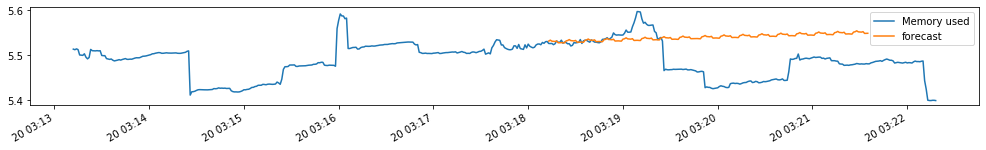

In [5]:
data['forecast'] = results.predict(start = 300, end=500 , dynamic= True)  
data[['Memory used','forecast']].plot(figsize=(17,2))

In [6]:
model = sm.tsa.statespace.SARIMAX(data['CPU used'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Users\rites\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\rites\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                             CPU used   No. Observations:                  544
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1296.579
Date:                              Sun, 14 Jun 2020   AIC                           2599.159
Time:                                      23:15:33   BIC                           2611.983
Sample:                                           0   HQIC                          2604.178
                                              - 544                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0892      0.046      1.961      0.050    3.24e-05       0.178
ma.S.L12      -0.99

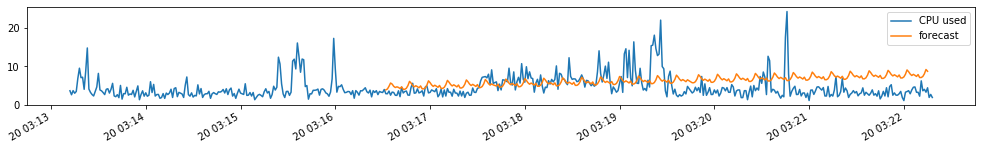

In [7]:
data['forecast'] = results.predict(start = 200, end=540 , dynamic= True)  
data[['CPU used','forecast']].plot(figsize=(17,2))

These Results show that ARIMA model cannot be used for prediction for extremely volatile data. This dataset is Memory usage and CPU usage data extracted from a computer therefore, it doesn't have trend. That is why ARIMA struggles on such a dataset.